# Example II: Harmonically trapped 1D fermions with energy restricted Hilbert space

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Energy benchmark

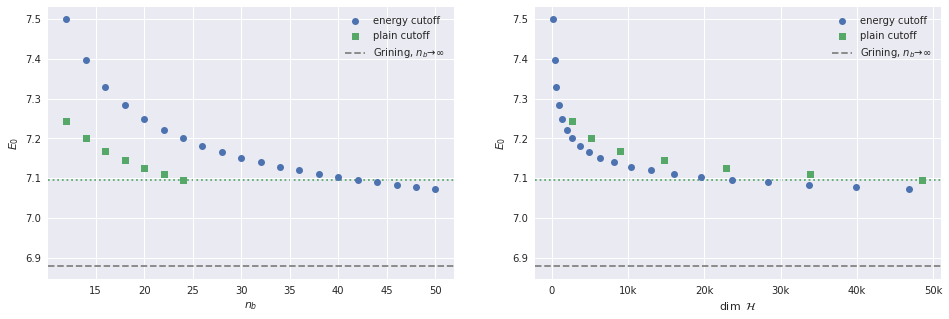

In [12]:
from scipy.interpolate import interp1d


# Read results.
coupling = 5.0
nb = 24
n_up, n_down = 3, 1

data_restricted = pd.read_csv("restricted_energies_g=5_N=3+1.csv")
gs_restricted = data_restricted[data_restricted['N']==1].sort_values(by="n_basis")

data_plain = pd.read_csv("plain_energies_g=5_N=3+1.csv")
gs_plain = data_plain[data_plain['N']==1].sort_values(by="n_basis")


with plt.style.context("seaborn"):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)


    # ----------------------------------------------------
    # ----------------------------------------------------
    # Energy restricted stuff.

    # Energy.
    line = ax[0].plot(gs_restricted["n_basis"], gs_restricted["energy"], marker='o', ls='', label='energy cutoff')
    ax[1].plot(gs_restricted["n_fock"], gs_restricted["energy"], marker='o', ls='', label='energy cutoff')

    # ----------------------------------------------------
    # ----------------------------------------------------
    # Plain basis cutoff comparison.

    # Energy.
    line = ax[0].plot(gs_plain["n_basis"], gs_plain["energy"], marker='s', ls='', label='plain cutoff')
    ax[1].plot(gs_plain["n_fock"], gs_plain["energy"], marker='s', ls='', label='plain cutoff')
    for a in ax[:2]:
        a.axhline(gs_plain["energy"].values[-1], color=line[0].get_color(), marker='', ls=':', zorder=0)

    # ----------------------------------------------------
    # ----------------------------------------------------
    # Benchmark section.

    # Energy, interpolated from digitized version..
    grin = pd.read_csv('grining_energy_g=5_N=3+1.dat')
    gef = interp1d(grin['g'], grin['e'])
    e_offset = 5.0 # Different y-axis in the Grining plot.
    for a in ax[:2]:
        a.axhline(gef(coupling)+e_offset, color='gray', ls='--', label='Grining, $n_b\\to\infty$', marker='')

    # ----------------------------------------------------
    # ----------------------------------------------------
    # Cosmetics & export.

    for a in ax:
        a.set_xticks([], minor=True)
        a.set_yticks([], minor=True)
        a.legend(loc='upper right')

    ax[0].set_xlabel('$n_b$')
    ax[0].set_ylabel('$E_0$')

    ax[1].set_xlabel('$\\dim\\ \\mathcal{H}$')
    ax[1].set_ylabel('$E_0$')
    # ax[1].set_xscale('log')
    # ax[1].legend(loc='upper right')
    ax[1].set_xticks([0, 1e4, 2e4, 3e4, 4e4, 5e4])
    ax[1].set_xticklabels(['0', '10k', '20k', '30k', '40k', '50k'])

## Density profile benchmark

Benchmark data digitized from Fig. 10 of [this paper](https://iopscience.iop.org/article/10.1088/1367-2630/17/11/115001).

In [2]:
def normalize_density(x, y):
    """ Normalizes the density to one.
    """
    return y/(np.sum(y)*(x[1]-x[0]))

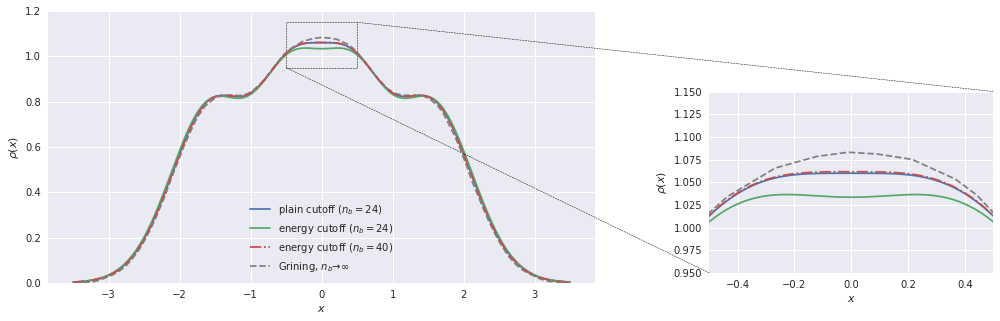

In [25]:
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


# ----
# Read results.
coupling = 5.0
n_up, n_down = 3, 1


with plt.style.context("seaborn"):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 5)
    iax = zoomed_inset_axes(ax, 4, loc='lower left', bbox_to_anchor=(800,50))

    # Plain density.
    nb = 24
    data_up = pd.read_csv("plain_density_up_nb={:d}.csv".format(nb))
    data_down = pd.read_csv("plain_density_down_nb={:d}.csv".format(nb))
    x = data_up['x']
    density = normalize_density(x,-data_up['density'])*n_up + normalize_density(x,-data_down['density'])*n_down

    for a in [ax, iax]:
        a.plot(x, density, ls='-', marker='', label='plain cutoff ($n_b = {:d}$)'.format(nb))

    # Energy restricted density.
    nb = 24
    data_up = pd.read_csv("restricted_density_up_nb={:d}.csv".format(nb))
    data_down = pd.read_csv("restricted_density_down_nb={:d}.csv".format(nb))
    x = data_up['x']
    density = normalize_density(x,-data_up['density'])*n_up + normalize_density(x,-data_down['density'])*n_down
    for a in [ax, iax]:
        a.plot(x, density,  ls='-', marker='', label='energy cutoff ($n_b = {:d}$)'.format(nb))

    nb_more = 40
    data_up = pd.read_csv("restricted_density_up_nb={:d}.csv".format(nb_more))
    data_down = pd.read_csv("restricted_density_down_nb={:d}.csv".format(nb_more))
    x = data_up['x']
    density = normalize_density(x,-data_up['density'])*n_up + normalize_density(x,-data_down['density'])*n_down
    for a in [ax, iax]:
        a.plot(x, density, ls='-.', marker='', zorder=10, label='energy cutoff ($n_b = {:d}$)'.format(nb_more))

        
    # Benchmark.
    grin_density = pd.read_csv('grining_density_g=5_N=3+1.dat')
    for a in [ax, iax]:
        a.plot(grin_density['x'], grin_density['rho'], color='gray', ls='--', marker='', label='Grining, $n_b\\to\infty$')

    # ---
    iax.set_xlim(-0.5, 0.5)
    iax.set_ylim(0.95, 1.15)
    mark_inset(ax, iax, loc1=3, loc2=1, fc="none", ec="black", lw=0.5, ls='--')
    iax.set_xticks([], minor=True)
    iax.set_yticks([], minor=True)
    
    ax.set_xticks([], minor=True)
    ax.set_yticks([], minor=True)

    for a in [ax, iax]:
        a.set_xlabel('$x$')
        a.set_ylabel('$\\rho(x)$')
    ax.set_ylim(0, 1.2)
    ax.legend(loc='lower center')

    fig.subplots_adjust(right=0.6)